***Write a program to implement KNN algorithm***

[[1 1]
 [1 1]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



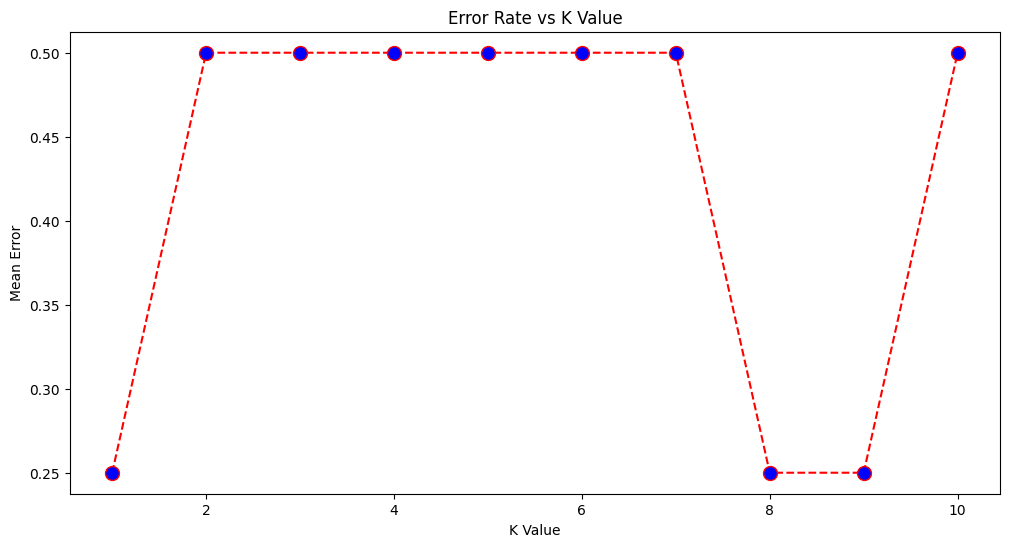

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Creating the dataset
data = {
    'User ID': [15624510, 15810944, 15668575, 15603246, 15804002, 15728773, 15598044,
                15694829, 15600575, 15727311, 15570769, 15606274, 15746139, 15733883,
                15617482, 15704583, 15621083, 15649487, 15736760, 15714658],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
               'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
               'Female', 'Male', 'Female', 'Male'],
    'Age': [19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 47, 45, 46, 48, 45, 47, 48],
    'EstimatedSalary': [19000, 20000, 43000, 57000, 76000, 58000, 84000, 150000,
                        33000, 65000, 80000, 52000, 86000, 25000, 26000, 28000,
                        29000, 22000, 49000, 41000],
    'Purchased': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Encoding categorical data
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Preprocessing
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training the K-NN model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Model persistence
output_model_file = 'Knnmodel.pkl'
with open(output_model_file, 'wb') as f:
    pickle.dump(classifier, f)

# Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


***Write a program to implement Random forest algorithm***

[[2 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



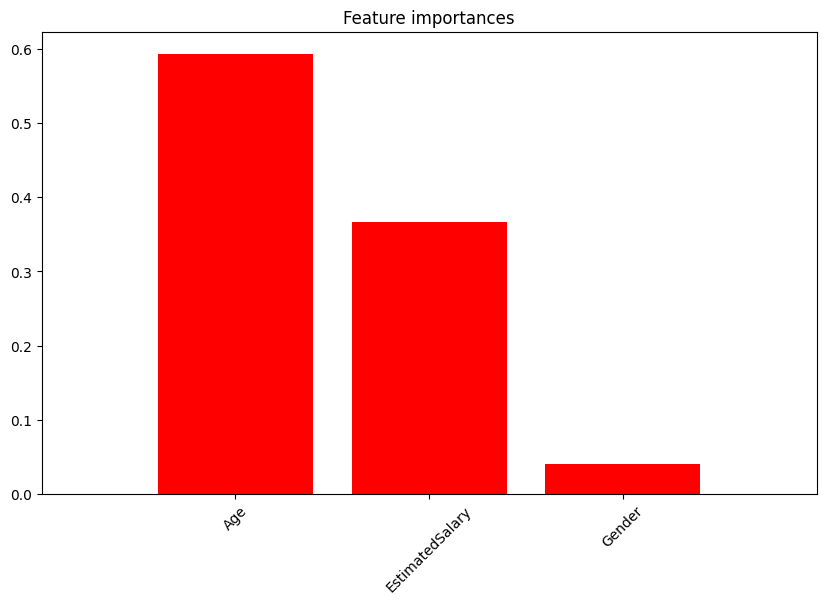

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import matplotlib.pyplot as plt

# Creating the dataset
data = {
    'User ID': [15624510, 15810944, 15668575, 15603246, 15804002, 15728773, 15598044,
                15694829, 15600575, 15727311, 15570769, 15606274, 15746139, 15733883,
                15617482, 15704583, 15621083, 15649487, 15736760, 15714658],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
               'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
               'Female', 'Male', 'Female', 'Male'],
    'Age': [19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 47, 45, 46, 48, 45, 47, 48],
    'EstimatedSalary': [19000, 20000, 43000, 57000, 76000, 58000, 84000, 150000,
                        33000, 65000, 80000, 52000, 86000, 25000, 26000, 28000,
                        29000, 22000, 49000, 41000],
    'Purchased': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Encoding categorical data
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Preprocessing
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature Scaling (optional for Random Forest, but often beneficial)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training the Random Forest model
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Model persistence
output_model_file = 'RandomForestModel.pkl'
with open(output_model_file, 'wb') as f:
    pickle.dump(classifier, f)

# Feature importance
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

***Write a program to implement Gaussian Naive Bayes algorithm***

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import numpy as np

# Creating the dataset
data = {
    'User ID': [15624510, 15810944, 15668575, 15603246, 15804002, 15728773, 15598044,
                15694829, 15600575, 15727311, 15570769, 15606274, 15746139, 15733883,
                15617482, 15704583, 15621083, 15649487, 15736760, 15714658],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
               'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
               'Female', 'Male', 'Female', 'Male'],
    'Age': [19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 47, 45, 46, 48, 45, 47, 48],
    'EstimatedSalary': [19000, 20000, 43000, 57000, 76000, 58000, 84000, 150000,
                        33000, 65000, 80000, 52000, 86000, 25000, 26000, 28000,
                        29000, 22000, 49000, 41000],
    'Purchased': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Encoding categorical data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Preprocessing
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Model persistence
output_model_file = 'GaussianNBModel.pkl'
with open(output_model_file, 'wb') as f:
    pickle.dump(model, f)

# Example prediction
sample = [[1, 30, 60000]]  # Sample: Female, Age 30, Estimated Salary 60000
sample = scaler.transform(sample)
predicted = model.predict(sample)
print("Predicted Value for sample [1, 30, 60000]:", predicted)


[[1 1]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

Predicted Value for sample [1, 30, 60000]: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


***Write a program to implement Multinomial Naive Bayes algorithm***

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Creating the dataset
data = {
    'User ID': [15624510, 15810944, 15668575, 15603246, 15804002, 15728773, 15598044,
                15694829, 15600575, 15727311, 15570769, 15606274, 15746139, 15733883,
                15617482, 15704583, 15621083, 15649487, 15736760, 15714658],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
               'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
               'Female', 'Male', 'Female', 'Male'],
    'Age': [19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 47, 45, 46, 48, 45, 47, 48],
    'EstimatedSalary': [19000, 20000, 43000, 57000, 76000, 58000, 84000, 150000,
                        33000, 65000, 80000, 52000, 86000, 25000, 26000, 28000,
                        29000, 22000, 49000, 41000],
    'Purchased': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Encoding categorical data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Preprocessing
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature Scaling to [0, 1] range
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  # Use fit_transform on the training data
X_test = scaler.transform(X_test)  # Use transform on the test data

# Training the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Model persistence
output_model_file = 'MultinomialNBModel.pkl'
with open(output_model_file, 'wb') as f:
    pickle.dump(model, f)

# Example prediction
sample = [[1, 30, 60000]]  # Sample: Female, Age 30, Estimated Salary 60000
sample = scaler.transform(sample)
predicted = model.predict(sample)
print("Predicted Value for sample [1, 30, 60000]:", predicted)


[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

Predicted Value for sample [1, 30, 60000]: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: Use

***Write a program to implement Logistic Regression algorithm***

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Creating the dataset
data = {
    'User ID': [15624510, 15810944, 15668575, 15603246, 15804002, 15728773, 15598044,
                15694829, 15600575, 15727311, 15570769, 15606274, 15746139, 15733883,
                15617482, 15704583, 15621083, 15649487, 15736760, 15714658],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
               'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
               'Female', 'Male', 'Female', 'Male'],
    'Age': [19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 47, 45, 46, 48, 45, 47, 48],
    'EstimatedSalary': [19000, 20000, 43000, 57000, 76000, 58000, 84000, 150000,
                        33000, 65000, 80000, 52000, 86000, 25000, 26000, 28000,
                        29000, 22000, 49000, 41000],
    'Purchased': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Encoding categorical data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Preprocessing
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Use fit_transform on the training data
X_test = scaler.transform(X_test)  # Use transform on the test data

# Training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Model persistence
output_model_file = 'LogisticRegressionModel.pkl'
with open(output_model_file, 'wb') as f:
    pickle.dump(model, f)

# Example prediction
sample = [[1, 30, 60000]]  # Sample: Female, Age 30, Estimated Salary 60000
sample = scaler.transform(sample)
predicted = model.predict(sample)
print("Predicted Value for sample [1, 30, 60000]:", predicted)


[[2 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Predicted Value for sample [1, 30, 60000]: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


***Write a program to implement Support Vector Machine algorithm***

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Creating the dataset
data = {
    'User ID': [15624510, 15810944, 15668575, 15603246, 15804002, 15728773, 15598044,
                15694829, 15600575, 15727311, 15570769, 15606274, 15746139, 15733883,
                15617482, 15704583, 15621083, 15649487, 15736760, 15714658],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
               'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
               'Female', 'Male', 'Female', 'Male'],
    'Age': [19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 47, 45, 46, 48, 45, 47, 48],
    'EstimatedSalary': [19000, 20000, 43000, 57000, 76000, 58000, 84000, 150000,
                        33000, 65000, 80000, 52000, 86000, 25000, 26000, 28000,
                        29000, 22000, 49000, 41000],
    'Purchased': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Encoding categorical data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Preprocessing
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the SVM model
model = SVC(kernel='linear', random_state=0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Model persistence
output_model_file = 'SVMModel.pkl'
with open(output_model_file, 'wb') as f:
    pickle.dump(model, f)

# Example prediction
sample = [[1, 30, 60000]]  # Sample: Female, Age 30, Estimated Salary 60000
sample = scaler.transform(sample)
predicted = model.predict(sample)
print("Predicted Value for sample [1, 30, 60000]:", predicted)


[[2 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Predicted Value for sample [1, 30, 60000]: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


***Write a program to implement Decision Tree algorithm***

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 0 0 1 1 1 0 1 1 0 1 0 0]
[1 0 1 1 1 0 0 1 1 1 0 0 1 0]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
[[2, 1, 0, 1], [2, 1, 0, 0], [0, 1, 0, 1], [1, 2, 0, 1], [1, 0, 1, 1], [1, 0, 1, 0], [0, 0, 1, 0], [2, 2, 0, 1], [2, 0, 1, 1], [1, 2, 1, 1], [2, 2, 0, 0], [0, 2, 1, 0], [0, 1, 0, 1], [1, 2, 0, 0]]
Predicted Value: [1]


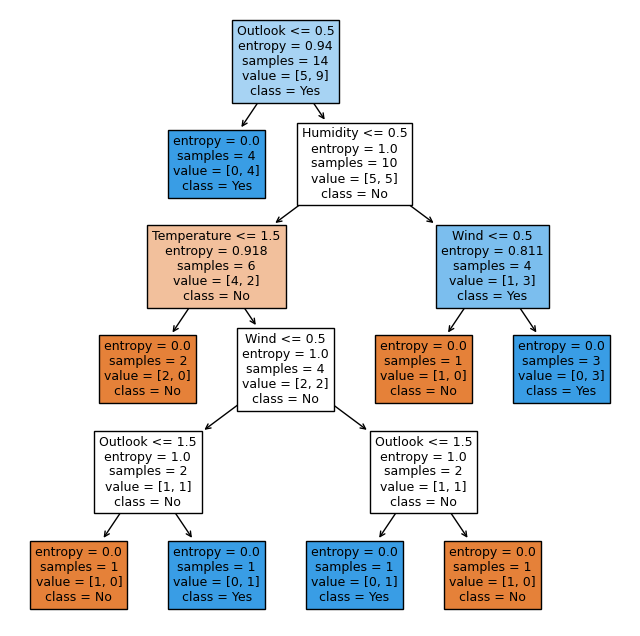

In [10]:
# Assigning features and label variables
outlook = ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny',
           'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain']
temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild',
               'Mild', 'Mild', 'Hot', 'Mild']
humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal',
            'Normal', 'High', 'Normal', 'High', 'High']
wind = ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak',
        'Weak', 'Strong', 'Strong', 'Weak', 'Strong']
play_tennis = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
               'Yes', 'Yes', 'Yes', 'No']

# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
outlook_encoded = le.fit_transform(outlook)
temperature_encoded = le.fit_transform(temperature)
humidity_encoded = le.fit_transform(humidity)
wind_encoded = le.fit_transform(wind)
target = le.fit_transform(play_tennis)

print(outlook_encoded)
print(temperature_encoded)
print(humidity_encoded)
print(wind_encoded)
print(target)

import numpy as np

# Zipping encoded features
zipped = zip(outlook_encoded, temperature_encoded, humidity_encoded, wind_encoded)
features = np.array(list(zipped)).tolist()
print(features)

from sklearn import tree

# Create a Decision Tree Classifier
model = tree.DecisionTreeClassifier(criterion='entropy')

# Train the model using the training sets
model.fit(features, target)

# Predict Output
predicted = model.predict([[0, 2, 0, 1]])  # Outlook: Sunny, Temperature: Mild, Humidity: High, Wind: Strong
print("Predicted Value:", predicted)

from matplotlib import pyplot as plt

# Plotting the Decision Tree
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(model, ax=ax, feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'], class_names=['No', 'Yes'], filled=True)
plt.show()
